In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  # MLP is an NN
from sklearn import svm
import numpy as np
import argparse
import imutils  # If you are unable to install this library, ask the TA; we only need this in extract_hsv_histogram.
import cv2
import os
import random
import skimage.filters as fr
import skimage.io as io
from commonfunctions import *

# Depending on library versions on your system, one of the following imports 
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_splitfrom commonfunctions import *
from matplotlib import pyplot as plt

In [45]:
path_to_dataset = r'totestwithhog'
target_img_size = (64, 64) # fix image size because classification algorithms THAT WE WILL USE HERE expect that

# We are going to fix the random seed to make our experiments reproducible 
# since some algorithms use pseudorandom generators
random_seed = 42  
random.seed(random_seed)
np.random.seed(random_seed)

In [46]:
def extract_hog_features(img):
    """
    TODO
    You won't implement anything in this function. You just need to understand it 
    and understand its parameters (i.e win_size, cell_size, ... etc)
    """
 #   thr = fr.threshold_otsu(img)
 #   img = np.where(img > thr, 1, 0)
    img = cv2.resize(img, target_img_size)
    win_size = (64, 64)
    cell_size = (8, 8)
    block_size_in_cells = (4, 4)
    
    block_size = (block_size_in_cells[1] * cell_size[1], block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 15  # Number of orientation bins
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    h = hog.compute(img)
    h = h.flatten()
    return h.flatten()

In [47]:
def extract_features(img, feature_set='hog'):
    
    """
    TODO
    Given either 'hsv_hist', 'hog', 'raw', call the respective function and return its output
    """
    if feature_set=='hsv_hist':
        feature=extract_hsv_histogram(img)
    elif feature_set=='hog':
        feature=extract_hog_features(img)
    else:
        feature=extract_raw_pixels(img)
            
        
    return feature

In [48]:
features = []
labels = []
def load_dataset(feature_set='hog'):
    features = []
    labels = []
    img_filenames = os.listdir(path_to_dataset)

    for i, fn in enumerate(img_filenames):
        if fn.split('.')[-1] != 'jpg' and fn.split('.')[-1] != 'bmp' :
            continue

        label = fn.split('-')[0]
      #  print(label)
        labels.append(label)

        path = os.path.join(path_to_dataset, fn)
        img = cv2.imread(path)
        features.append(extract_features(img, feature_set))
        # show an update every 1,000 images
        if i > 0 and i % 1000 == 0:
            print("[INFO] processed {}/{}".format(i, len(img_filenames)))
 
        
    return features, labels        

In [49]:
# TODO understand the hyperparameters of each classifier
classifiers = {
    'SVM': svm.LinearSVC(random_state=random_seed),
 #   'KNN': KNeighborsClassifier(n_neighbors=5),
   # 'NN': MLPClassifier(solver='sgd', random_state=random_seed, hidden_layer_sizes=(500,), max_iter=20, verbose=1)
}

In [50]:
# This function will test all our classifiers on a specific feature set
def run_experiment(feature_set):
    
    # Load dataset with extracted features
    print('Loading dataset. This will take time ...')
    features, labels = load_dataset(feature_set)
#    print(features)
#    print(labels)
    print('Finished loading dataset.')
    
    # Since we don't want to know the performance of our classifier on images it has seen before
    # we are going to withhold some images that we will test the classifier on after training 
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, test_size=0.2, random_state=random_seed)
    
    for model_name, model in classifiers.items():
        print('############## Training', model_name, "##############")
        # Train the model only on the training features
        model.fit(train_features, train_labels)
        
        # Test the model on images it hasn't seen before
        accuracy = model.score(test_features, test_labels)
        
        print(model_name, 'accuracy:', accuracy*100, '%')

In [51]:
run_experiment('hog')


Loading dataset. This will take time ...
[INFO] processed 1000/11517
[INFO] processed 2000/11517
[INFO] processed 3000/11517
[INFO] processed 4000/11517
[INFO] processed 5000/11517
[INFO] processed 6000/11517
[INFO] processed 7000/11517
[INFO] processed 8000/11517
[INFO] processed 9000/11517
[INFO] processed 10000/11517
[INFO] processed 11000/11517
Finished loading dataset.
############## Training SVM ##############
SVM accuracy: 92.13385484571926 %


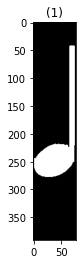

['5']


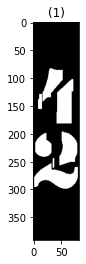

['0']


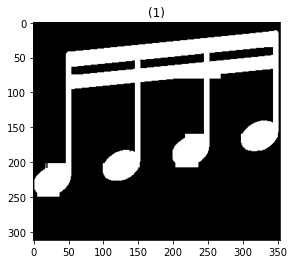

['15']


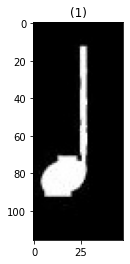

['5']


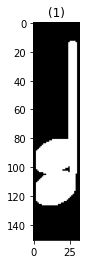

['5']


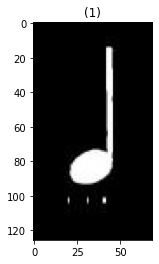

['5']


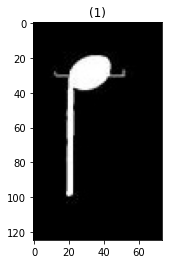

['11']


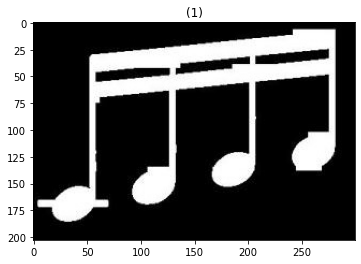

['15']


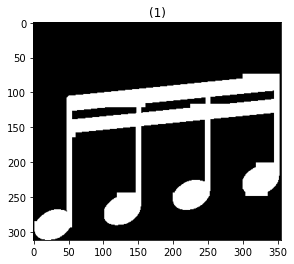

['0']


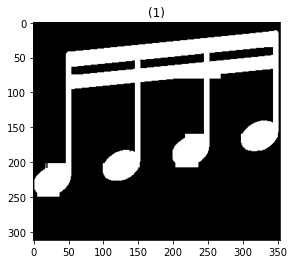

['15']


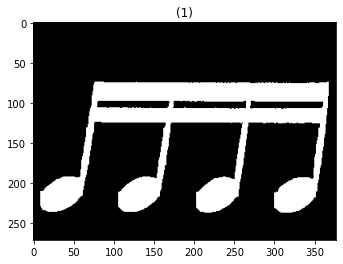

['2']


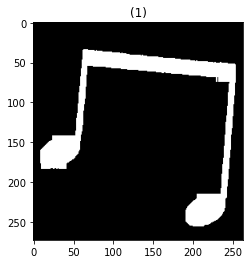

['15']


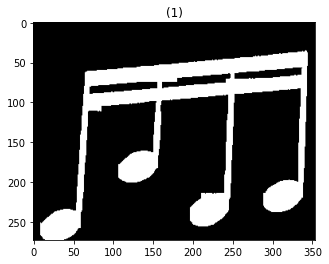

['15']


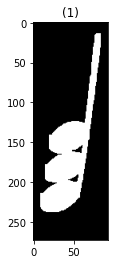

['5']


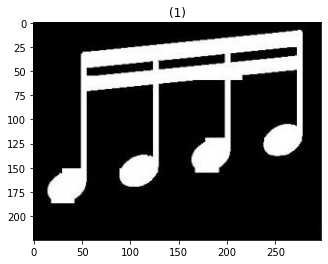

['15']


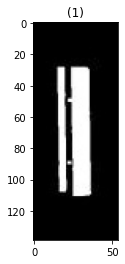

['17']


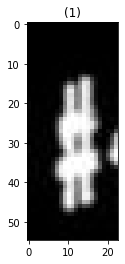

['1']


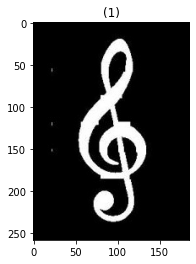

['16']


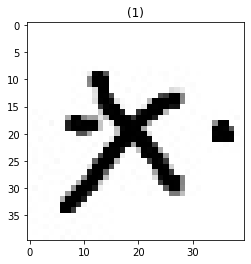

['0']


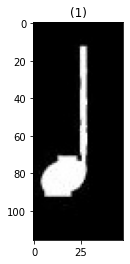

['5']


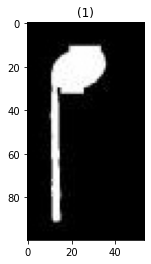

['11']


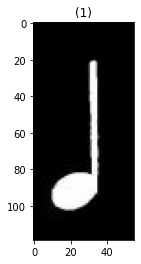

['5']


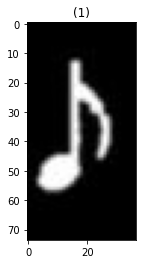

['7']


In [52]:
# Example
testpathes=['5-1 (1).png','20-1.png','09.PNG_line_1_char_1.png','underdot.jpg','13-0.png' ,'alsounderdot.jpg','alsoupdot.jpg','anotherbeamtoteat.jpg' ,'beaming_1.png','beaming_2.png','beaming_3.png','beaming_4.png','beaming_5.png','chords_2.png', 'doublebeamtotest.jpg','endsymmbol.jpg','hash.jpg', 'starttotest.jpg', 'test.jpg' ,'underdot.jpg','withupdot.jpg' ,'withdotinbuttom.jpg ','withonflagtest.jpg']
for path in testpathes:
    img = cv2.imread( path )
    show_images([img])
    features = extract_features(img, 'hog')
    nn = classifiers['SVM']
    print(nn.predict([features]))
